# Modelling Wind Speed and Direction Distribution using Gaussain Mixture Modles (OEN method)

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Modles, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *

## 1.2 Read Data

In [2]:
# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # weird shape at 3, try 4
# ipath= './data/NCDC/tiree.txt'
# ipath= "./data/NCDC/marham.txt"

# ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # recent 5 year maybe corrupted
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # high initial data
# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # corrupted
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt"
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year data is corrupted

# ipath= "./data/NCDC/canada/melita_man/dat.txt" 
# ipath= "./data/NCDC/canada/manouane_est_que/dat.txt"  
# ipath= "./data/NCDC/canada/st_johns_intl/dat.txt" # lack 2011-12
# ipath= "./data/NCDC/canada/mildred_lake_alta/dat.txt"  # uptail wind speed 
# ipath= "./data/NCDC/canada/fort_smith/dat.txt" # hard to fit
# ipath= "./data/NCDC/canada/havre_st_pierre/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/moosonee_awos/dat.txt" # truncate, irregular sample time
# ipath= "./data/NCDC/canada/hay_rivier_a/dat.txt" # truncate
# ipath= "./data/NCDC/canada/gander_intl/dat.txt" # truancate dataset, try 4, lack of 2011-12
# ipath= "./data/NCDC/canada/tukialik_bay/dat.txt" # truncate, time shift
# ipath= "./data/NCDC/canada/lac_benoit_que/dat.txt" # has 0 speed records
# ipath= "./data/NCDC/canada/blank_sablon/dat.txt" # truncate
# ipath= "./data/NCDC/canada/argentia/dat.txt" # weird shape
# ipath= "./data/NCDC/canada/longue_pointe/dat.txt" # data may have problem, weird direction distribution

# ipath= "./data/NCDC/europe/avord/dat.txt" # try 4
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer
# ipath= "./data/NCDC/europe/salamanca/dat.txt" # recent 5 year is truncate data, before is better

# ipath= "./data/NCDC/south_america/senador_petronio/dat.txt"
# ipath= "./data/NCDC/south_america/ambrosio_lv/dat.txt" # 16 sectors

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" 
# ipath= "./data/NCDC/oceania/brisbane/dat.txt" # bad fit
# ipath= "./data/NCDC/oceania/auckland/dat.txt"  # Weird KDE shape

# ipath= "./data/NCDC/cn/南京lukou/dat.txt" # 
# ipath= "./data/NCDC/cn/luogang/dat.txt"  # 
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" # 
# ipath= "./data/NCDC/cn/wuxu/dat.txt" # 
# ipath= "./data/NCDC/cn/武汉tianhe/dat.txt" # chi square 有问题
# ipath= "./data/NCDC/cn/wusu/dat.txt" # chi square 有问题, bandwidth 过小
# ipath= "./data/NCDC/cn/binhai/dat.txt" # good, but recent 5 year data may have been corrupted, 05-09 is good
# ipath= "./data/NCDC/cn/gushi/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/yueyang/dat.txt" # 16 sectors, some direction deviate big
# ipath= "./data/NCDC/cn/广州baiyun/dat.txt" # Is this dataset correct?
# ipath= "./data/NCDC/cn/zhengding/dat.txt" #  Initial data is weird

# ipath= "./data/NCDC/cn/baoan_intl/dat.txt" # 
# ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" # good
ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= './data/NCDC/cn/macau/dat.txt' # not good, feels like truncate data, try 4
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # truncate dataset

## US dataset, is mostly over a threshold, low wind speed is not complete
# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted
# ipath= "./data/NCDC/us/sacramento_arp/dat.txt"  
# ipath= "./data/NCDC/us/st_louis_arp/9511346969491dat.txt"  
# ipath= './data/NCDC/us/huron/3461896967321dat.txt'
# ipath= "./data/NCDC/us/baltimore/9963956959409dat.txt"
# ipath= './data/NCDC/us/kennedy/5807936958436dat.txt'
# ipath= './data/NCDC/us/newark/8455636958433dat.txt'
# ipath= './data/NCDC/us/la_guardia/1057036958434dat.txt'
# ipath= "./data/NCDC/us/olympia_airport/2647036962786dat.txt" 
# ipath= "./data/NCDC/us/sidney/6062326959357dat.txt" 
# ipath= "./data/NCDC/us/general_mitchell_intl/dat.txt"
# ipath= "./data/NCDC/us/quad_city_arp/dat.txt" 

## Problem dataset
# ipath= "./data/NCDC/canada/stony_rapids_arpt/dat.txt" # truncate data
# ipath= "./data/NCDC/canada/baker_lake/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/rankin_inlet/dat.txt" # wrong data
# ipath= "./data/NCDC/canada/deer_lake_a/dat.txt" # bad dataset
# ipath= './data/NCDC/europe/tenerife_sur/dat.txt'  # recent year speed wired
# ipath= "./data/NCDC/south_america/carlos_ibanez/dat.txt" # bad dataset, direction
# ipath= "./data/NCDC/south_america/rio_cuarto/dat.txt"  # bad dataset
# ipath= "./data/NCDC/south_america/senador_nilo/dat.txt" # bad dataset, direction 
# ipath= "./data/NCDC/cn/长沙huanghua/dat.txt" # direction may not be real
# ipath= "./data/NCDC/dr_ambedkar_intl/dat.txt" # Wrong data

uipath = unicode(ipath , "utf8")

if not "cn_database" in ipath: 
    df = pd.read_csv(uipath,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed' ]]
else:
    df = read_cn_database(uipath)

In [3]:
df = df.query("(dir < 999) & (speed < 999) & \
              (date >= 19800000) & (date < 20160000) ")
df.index= df['date']

In [4]:
# Turn dir into [0,360), some station are[10,360],some are [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360) 
df['dir_windrose'] = df['dir']
# Convert windrose coordianates to Polar Cooridinates 
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360)
df.describe()

,date,HrMn,dir,speed,dir_windrose
count,1.587660e+05,158766.000000,158766.000000,158766.000000,158766.000000
mean,2.010615e+07,1152.017308,173.735372,4.881858,158.933462
std,3.061164e+04,687.899412,113.609266,2.185699,108.160226
min,2.004071e+07,0.000000,0.000000,1.000000,0.000000
25%,2.008112e+07,530.000000,70.000000,3.000000,70.000000
50%,2.011041e+07,1130.000000,150.000000,5.000000,140.000000
75%,2.013082e+07,1730.000000,290.000000,6.000000,260.000000
max,2.015123e+07,2330.000000,350.000000,21.000000,350.000000


False


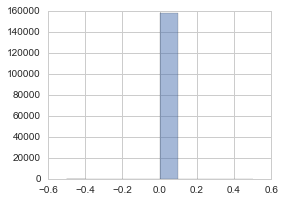

In [5]:
# Detect data stored in knot or m/s
## For data stored originally in knot, the data would cluster at 0.1 and 0.9
df['decimal'] = df.speed % 1 
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4,3))
knot_unit = True if len(df.query('decimal >= 0.2'))/len(df) > 0.3 else False

# Using unit in knot instead of m/s
if knot_unit:
    df['speed']=df['speed']*1.943845
    df['decimal'] = df.speed % 1 
    df.decimal.hist(alpha=0.5,label='knot')
    # need more elaboration, some is not near an integer
    df['speed']=df['speed'].apply(lambda x: int(round(x)))
    plt.legend()

print knot_unit

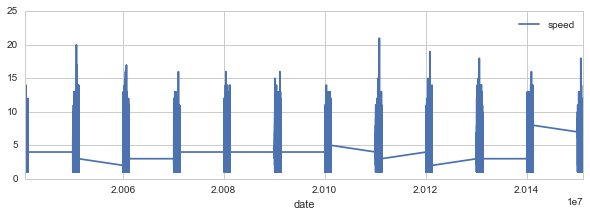

In [6]:
df['speed'].plot(legend=True,figsize=(10,3), grid=True)

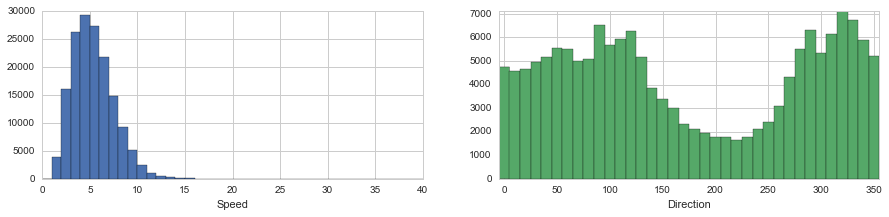

In [7]:
# Notice the gap of the distributions, so futher process needed, as below
plot_speed_and_angle_distribution(df.speed, df.dir)

## 1.3 Data Wrangling

### 1.3.1 Artefacts handling

#### 1.3.1.1 wrong direction record

In [8]:
display(df.query('dir % 10 >= 0.1'))
df = df.query('dir % 10 <= 0.1')

,date,HrMn,type,dir,speed,dir_windrose,decimal
date,,,,,,,


#### 1.3.1.2 sudden increase in speed

,date,HrMn,type,dir,speed,dir_windrose,decimal,incre,incre_reverse
date,,,,,,,,,
20110806,20110806,2230,FM-15,130,21.0,320,0.0,1.0,3.0
20050806,20050806,1700,FM-15,330,20.0,120,0.0,1.0,2.0
20050806,20050806,1300,FM-15,330,20.0,120,0.0,5.0,2.0
20110806,20110806,2200,FM-15,130,20.0,320,0.0,2.0,-1.0
20050806,20050806,1600,FM-15,320,19.0,130,0.0,0.0,-1.0
20110807,20110807,30,FM-15,150,19.0,300,0.0,1.0,2.0
20050806,20050806,1500,FM-15,320,19.0,130,0.0,1.0,0.0
20050806,20050806,1000,FM-15,330,19.0,120,0.0,4.0,2.0
20120808,20120808,300,FM-15,0,19.0,90,0.0,1.0,1.0


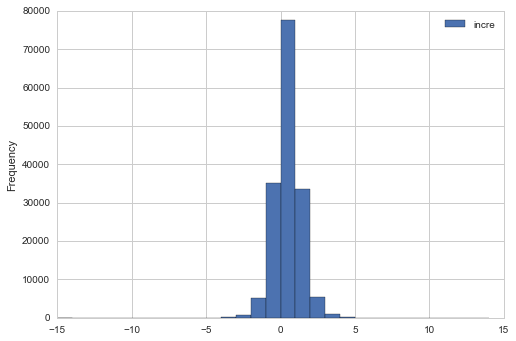

In [9]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True)

In [10]:
incre_threshold = 20 if knot_unit else 10
print 'sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )'))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

sudden increase number 0


After Simple Aretefacts Handling

In [11]:
# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

,date,HrMn,type,dir,speed,dir_windrose,decimal,incre,incre_reverse
date,,,,,,,,,
20110806,20110806,2230,FM-15,130,21.0,320,0.0,1.0,3.0
20050806,20050806,1700,FM-15,330,20.0,120,0.0,1.0,2.0
20050806,20050806,1300,FM-15,330,20.0,120,0.0,5.0,2.0
20110806,20110806,2200,FM-15,130,20.0,320,0.0,2.0,-1.0
20050806,20050806,1600,FM-15,320,19.0,130,0.0,0.0,-1.0
20110807,20110807,30,FM-15,150,19.0,300,0.0,1.0,2.0
20050806,20050806,1500,FM-15,320,19.0,130,0.0,1.0,0.0
20050806,20050806,1000,FM-15,330,19.0,120,0.0,4.0,2.0
20120808,20120808,300,FM-15,0,19.0,90,0.0,1.0,1.0


#### 1.3.1.3 re-distribute angle, for un-evenly sectored data
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [12]:
df['dir'].value_counts().sort_index()

0      4749
10     4563
20     4658
30     4948
40     5187
50     5541
60     5496
70     4987
80     5103
90     6513
100    5690
110    5917
120    6289
130    5188
140    3854
150    3398
160    3025
170    2333
180    2100
190    1959
200    1796
210    1792
220    1631
230    1796
240    2116
250    2432
260    3094
270    4333
280    5522
290    6339
300    5329
310    6129
320    7108
330    6758
340    5884
350    5209
Name: dir, dtype: int64

In [13]:
effective_coloumn = df['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()

if len(effective_coloumn) == 16:
    # For some dataset, the angle is not evenly distributed, so there is a need to redistribute
    original_angle = list(effective_coloumn.sort_index().index)
    redistributed_angle = linspace(0,360,num=17)[:-1]
    df['dir'].replace(to_replace=original_angle, value=redistributed_angle, inplace=True)
    display(df['dir'].value_counts().sort_index())

SECTOR_LENGTH = 360/len(effective_coloumn)
print len(effective_coloumn), SECTOR_LENGTH

36 10.0


### 1.3.2 Sampling Type Selection

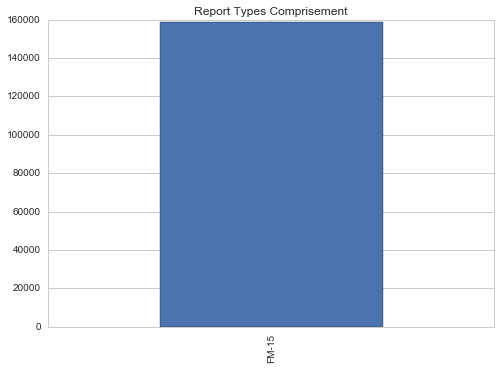

In [14]:
df.query('date > 20000000')['type'].value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement')

report_type_most_used = df.query('date > 20000000')['type'].value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.3.3 Sampling Time Selection

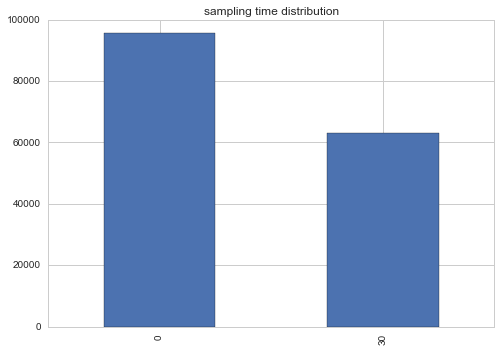

In [15]:
df['sample_time'] = df.HrMn % 100 
df.query('date > 20000000')['sample_time'].value_counts().plot(
    kind = 'bar', title = 'sampling time distribution')

sampling_time_most_used = df.query('date > 20000000')['sample_time'].value_counts().argmax()
df = df.query("sample_time==@sampling_time_most_used")
df.drop(['sample_time'], 1,inplace=True)

In [16]:
df['HrMn'].value_counts().sort_index()

0       3907
100     3937
200     3977
300     4016
400     4045
500     4076
600     4088
700     4120
800     4114
900     4110
1000    4091
1100    4087
1200    4059
1300    4036
1400    4023
1500    3978
1600    3903
1700    3930
1800    3901
1900    3849
2000    3893
2100    3864
2200    3864
2300    3882
Name: HrMn, dtype: int64

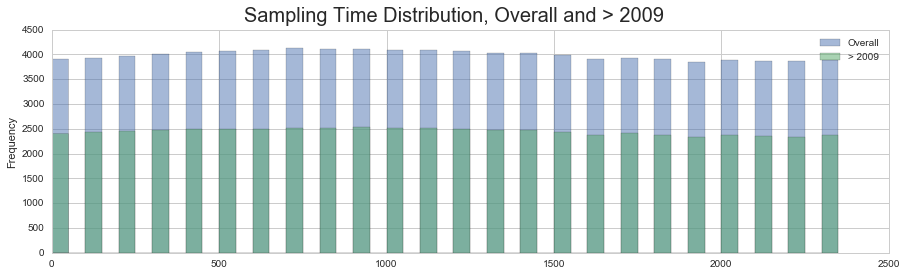

In [17]:
MID_YEAR = int(((min(df.date)+max(df.date))/2 )/10000)
# Ensure data sampled equally
bins=arange(min(df.HrMn), max(df.HrMn) + 100, 50)

df['HrMn'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='> %s' %  MID_YEAR )

plt.suptitle('Sampling Time Distribution, Overall and > %s ' %  MID_YEAR, fontsize = 20)
plt.legend()

### 1.3.4 Re-distribute Direction and Speed
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

In [18]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

def randomize_angle(df, sector_length = 10):
    if DIR_REDISTRIBUTE == 'even':
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(-sector_length/2,sector_length/2)))
    else:
        df['dir_ran'] = df['dir'].apply(lambda x: (x + np.random.uniform(0,sector_length)))

    bins=arange(0, 360+10, 5)
    df['dir'].hist(bins=bins, alpha=0.5)
    bins=arange(0, 360+10, 1)
    df['dir_ran'].hist(bins=bins, alpha=0.5,figsize=(15, 4))
    
    df['dir']=df['dir_ran']
    df.drop(['dir_ran'], 1,inplace=True)
    return df

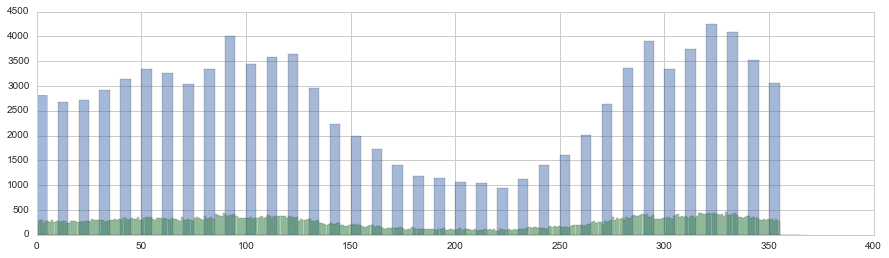

In [19]:
# Randomize the angle degree, to form a better KDE estimation
df = randomize_angle(df, SECTOR_LENGTH)

In [20]:
def randomize_speed(df):
    # Round down speed, need more caution
    df['speed_ran'] = df['speed'].apply(lambda x: (x + np.random.uniform(-1,0)) if x > 0 else x)
    
    max_speed = df.speed.max()
    df['speed'].hist(bins=arange(0, max_speed), alpha=0.5)
    df['speed_ran'].hist(bins=arange(0, max_speed, 0.5), alpha=0.5,figsize=(15, 4))
    
    df['speed']=df['speed_ran']
    df.drop(['speed_ran'], 1,inplace=True)
    return df

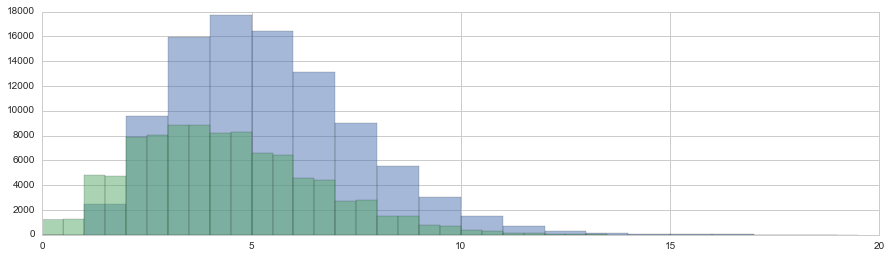

In [21]:
# Each original cell is split between the value, # so the peak is shift left
# e.g. 2 -> (1.5,2), (2,2.5); or 3 -> (2,3)
df = randomize_speed(df)

### 1.3.5 Generate (x,y) from (speed,dir)

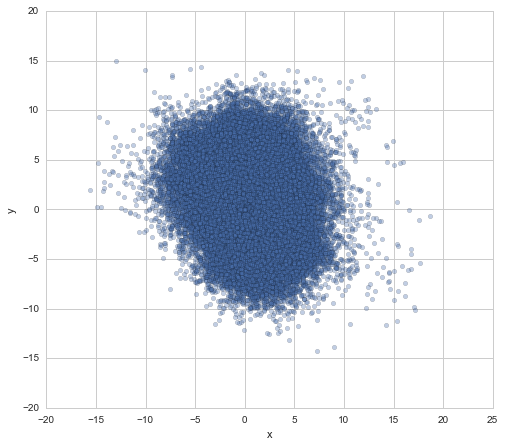

In [22]:
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)
fig, ax = plt.subplots(figsize=(8, 8), dpi=80)
ax.set_aspect('equal')
df.plot(kind='scatter', x='x', y='y', alpha=0.35, ax=ax)

## 1.4 Time Shift Comparison

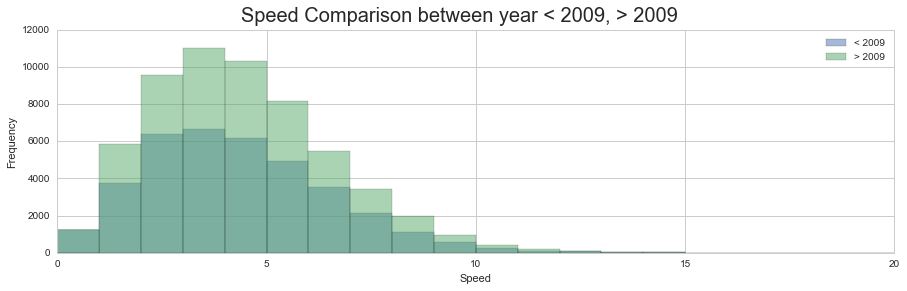

In [23]:
# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=bins, label='> %s' % MID_YEAR)

plt.xlabel("Speed")
plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 20)
plt.legend()

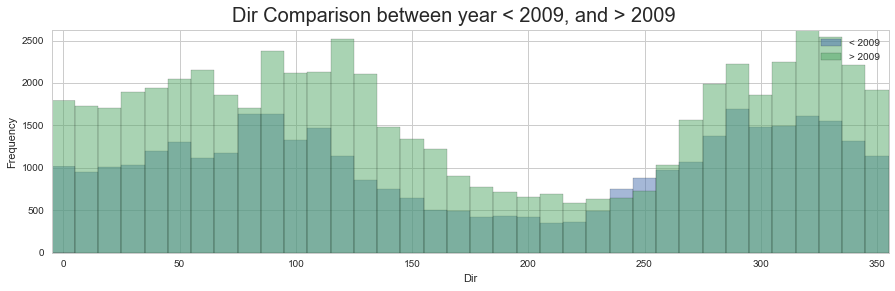

In [24]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,figsize=(15, 4),bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.xlabel("Dir")
plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 20)
plt.axis('tight')
plt.legend()

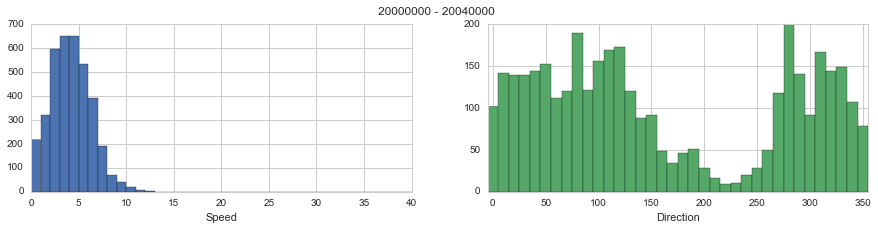

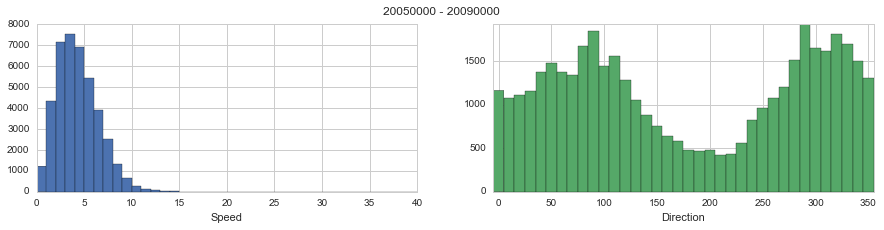

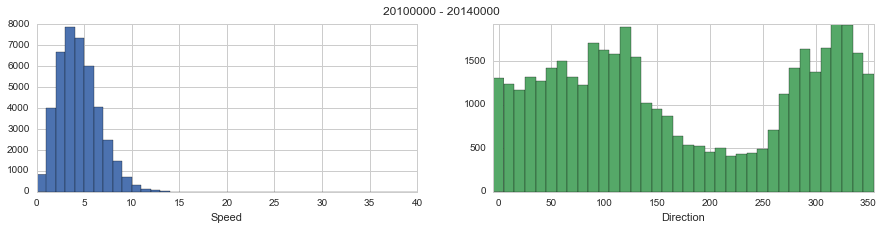

In [25]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
def check_time_shift(df):
    for start_time in xrange(19850000, 20150000, 50000):
        end_time = start_time + 50000 
        sub_df = df.query('(date >= @start_time) & (date < @end_time)')
        if len(sub_df) > 0 :
            title = '%s - %s' %(start_time, end_time-10000)
            plot_speed_and_angle_distribution(sub_df.speed, sub_df.dir, title)
        
check_time_shift(df)

## 1.5 Re-select data, and overview of the clean dataset

In [26]:
## Summery of the data selection
print 'incre_threshold for artefact detect:', incre_threshold
print 'Report type used:', report_type_most_used
print 'Sampling time used:', sampling_time_most_used

df_all_years = df
df = df.query('(date >= 20100000) & (date < 20150000)')
df.describe()

incre_threshold for artefact detect: 10
Report type used: FM-15
Sampling time used: 0


,date,HrMn,dir,speed,dir_windrose,decimal,incre,incre_reverse,x,y
count,4.207000e+04,42070.000000,42070.000000,42070.000000,42070.000000,42070.0,42070.000000,42070.000000,42070.000000,42070.000000
mean,2.012064e+07,1140.411219,173.045148,4.459121,161.661517,0.0,-0.000119,0.000143,0.823934,0.843144
std,1.410107e+04,687.131867,113.548768,2.191441,109.530912,0.0,0.877413,0.882586,3.091746,3.706476
min,2.010010e+07,0.000000,-4.994325,0.000197,0.000000,0.0,-7.000000,-10.000000,-14.649603,-11.203107
25%,2.011040e+07,500.000000,74.720939,2.839365,70.000000,0.0,-1.000000,0.000000,-1.278857,-1.860837
50%,2.012070e+07,1100.000000,143.795015,4.220474,140.000000,0.0,0.000000,0.000000,1.052869,0.594127
75%,2.013093e+07,1700.000000,290.510116,5.797138,270.000000,0.0,0.000000,1.000000,3.030487,3.618950
max,2.014123e+07,2300.000000,354.996293,19.852136,350.000000,0.0,8.000000,6.000000,18.648532,14.990598


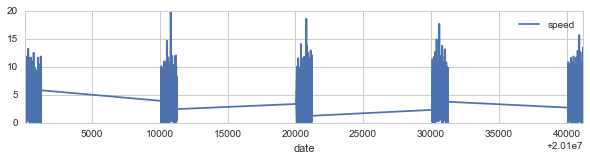

In [27]:
df['speed'].plot(legend=True,figsize=(10,2), grid=True)

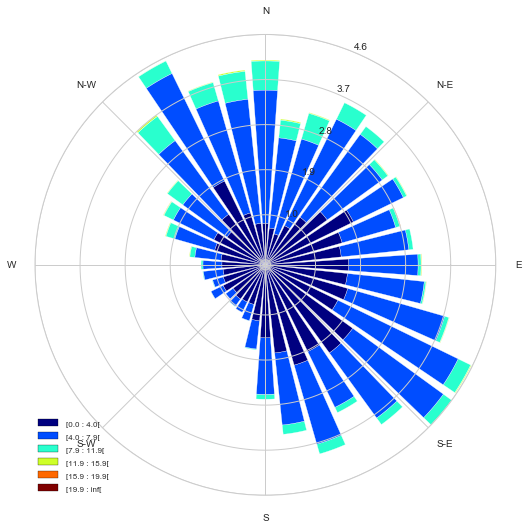

In [28]:
# 90 degree is in east
ax = WindroseAxes.from_ax()
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36)
ax.set_legend()

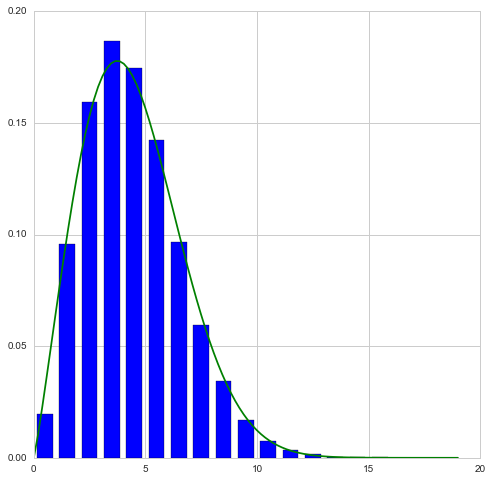

In [29]:
ax, _params = WindAxes.from_ax().pdf(df.speed, 
                                     bins=arange(0, max(df.speed)))
weibull_params = sp.stats.exponweib.fit(df.speed, floc=0, f0=1)

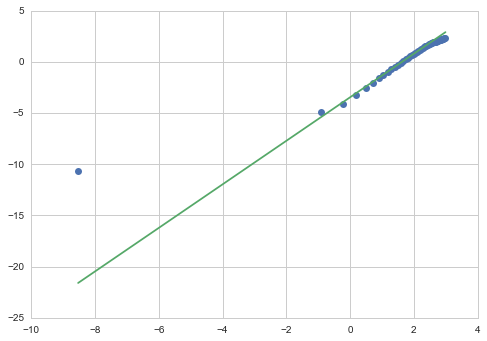

In [30]:
sample = df.speed
ecdf = sm.distributions.ECDF(sample)

x = linspace(min(sample), max(sample))
y = ecdf(x)
plt.plot(log(x), log(-log(1-y)),'o')

w_scale, c_shape = weibull_params[1], weibull_params[3]
qz=exp(-(x/c_shape)**w_scale)
plt.plot(log(x), log(-log(qz)),'-')

# 2. Create input data, i.e. speed_set

In [31]:
# speed_set = array(zip(-df.x, -df.y)) # Adjust the direction to match for Cook's paper
SPEED_SET = array(zip(df.x, df.y))
max_speed = df.speed.max()
NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7

In [32]:
FITTING_RANGE = []
fit_limit = ceil(df['speed'].quantile(.95))
plot_limit = ceil(df['speed'].quantile(.975))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)
    
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])
        
print fitting_axis_range

[-9. -8. -7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.
  9.]


# 3. Kernel Density Estimation

In [33]:
sample = SPEED_SET

In [34]:
# # The bandwidth value sometimes would be too radical, so we forsake this approach
# from sklearn.grid_search import GridSearchCV

# if knot_unit:
#     bandwidth_range = arange(0.5,2,0.2)
# else:
#     bandwidth_range = arange(0.4,1,0.1)

# grid = GridSearchCV(neighbors.KernelDensity(),
#                     {'bandwidth': bandwidth_range},
#                     n_jobs=-1, cv=4) 
# grid.fit(sample)
# bandwidth = grid.best_params_['bandwidth']

In [35]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH 

kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print 'bandwidth:', bandwidth, len(kde_result)
print kde_result[:5]

bandwidth: 0.7 361
[  3.42234505e-07   8.22960903e-07   3.10460605e-07   1.19862859e-06
   6.18877425e-06]


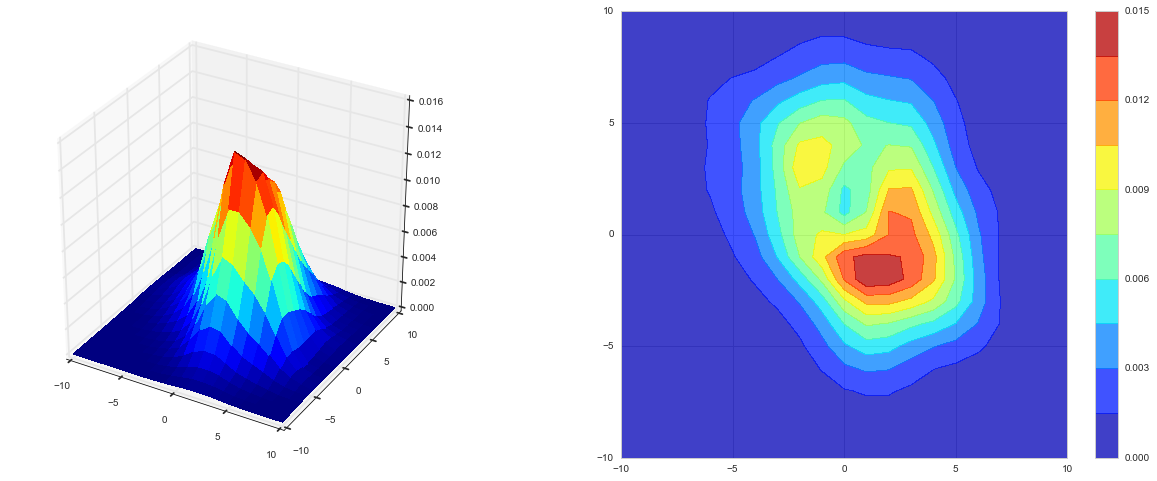

In [36]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,2,2)
plot_2d_prob_density(X,Y,kde_Z,ax2)

In [37]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM Estimation, using EM algo

In [38]:
sample= SPEED_SET
clf = mixture.GMM(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print clf.converged_

True


In [39]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)  

,weight,mean_x,mean_y,sig_x,sig_y,corr
0,0.403100,1.935852,-1.858129,2.334360,2.531251,-0.059651
1,0.300134,1.968376,3.052301,2.629009,3.319637,-0.280373
2,0.296766,-1.843820,2.278078,2.774893,3.088731,-0.234466


GMM Plot Result
0.403099938171 [[ 1.93585164 -1.85812913]] [ 2.3094436   2.55400439] -161.826145962
0.300133762931 [[ 1.96837597  3.05230109]] [ 2.40229226  3.48721448] -155.006491132
0.296766298898 [[-1.84382047  2.2780784 ]] [ 2.53178474  3.29095006] -147.300653934


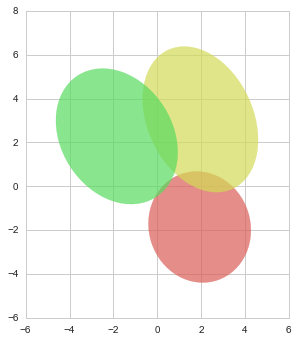

In [40]:
plot_gmm_ellipses(gmm_em_result)

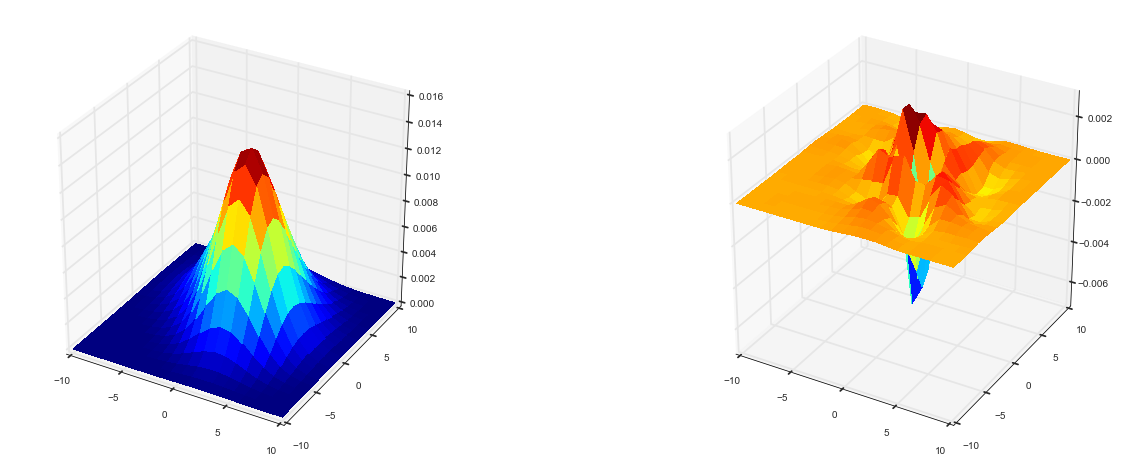

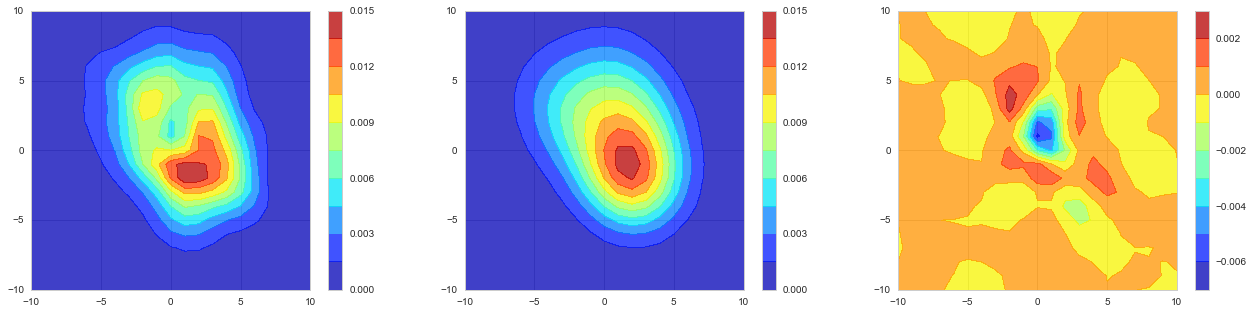

In [41]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)[0]))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points)[0])
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2,projection = '3d')
plot_3d_prob_density(X,Y,residual_Z,ax2)

fig = plt.figure(figsize=(22,5))
ax1 = fig.add_subplot(1,3,1)
plot_2d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,3,2)
plot_2d_prob_density(X,Y,pdf_Z,ax2)
ax3 = fig.add_subplot(1,3,3)
plot_2d_prob_density(X,Y,residual_Z,ax3)

## GMM, EM VS. KDE

In [42]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points)[0])
# put into Pandas to make it looks better
pd.DataFrame([goodness_of_fit_summary(gmm_pdf_result, kde_result)])

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.035033,0.025586,6.853065e-07,0.056155,0.302842,0.943147


# 5. Least Square Prob Estimation

In [43]:
sample = SPEED_SET
points = FITTING_RANGE

In [44]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
        # {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
        # {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*int(len(x0)/6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points,FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -15.131711204642832
     jac: array([  2.86260974e+00,  -2.38418579e-07,   3.57627869e-07,
         1.19209290e-07,   4.76837158e-07,   7.15255737e-07,
         2.86261165e+00,   1.19209290e-06,   0.00000000e+00,
        -4.76837158e-07,   3.57627869e-07,  -8.34465027e-07,
         2.86261046e+00,   8.34465027e-07,  -3.57627869e-07,
         7.15255737e-07,   0.00000000e+00,   9.53674316e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 817
     nit: 40
    njev: 40
  status: 0
 success: True
       x: array([ 0.33773616, -1.47393624,  4.00062393,  2.45220723,  2.61524028,
        0.24543905,  0.15563899,  3.20365317,  2.42224421,  1.35032032,
        2.60460796, -0.0936516 ,  0.50662485,  1.66020777, -1.80094093,
        2.74651048,  2.25474824, -0.09094257])

## 5.1 GMM Result

In [45]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)

pretty_print_gmm(gmm)

,weight,mean_x,mean_y,sig_x,sig_y,corr
0,0.506625,1.660208,-1.800941,2.746510,2.254748,-0.090943
1,0.337736,-1.473936,4.000624,2.452207,2.615240,0.245439
2,0.155639,3.203653,2.422244,1.350320,2.604608,-0.093652


GMM Plot Result
0.506624853316 [[ 1.66020777 -1.80094093]] [ 2.22734432  2.76878074] -102.303304568
0.337736155327 [[-1.47393624  4.00062393]] [ 2.19067844  2.83790944] 142.352421659
0.155638991357 [[ 3.20365317  2.42224421]] [ 1.34223334  2.60878463] -176.217773001


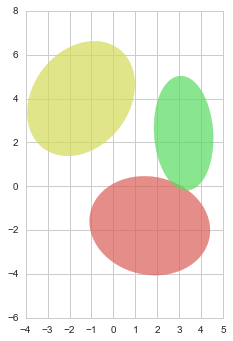

In [46]:
plot_gmm_ellipses(gmm)

## 5.2 Goodness-of-fit indicators

In [47]:
pd.DataFrame(
    [goodness_of_fit_summary(gmm_pdf_result, kde_result)])

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.089612,0.012573,2.681522e-07,0.035127,0.189437,0.977754


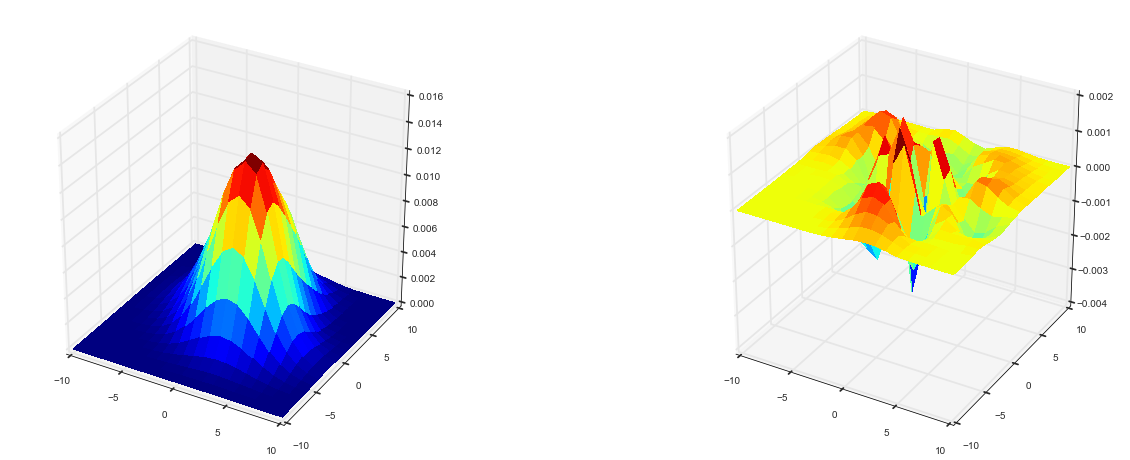

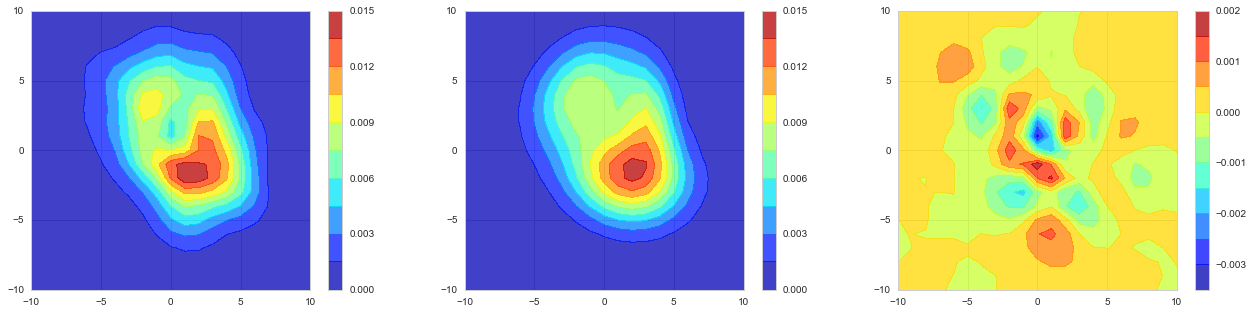

In [48]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(1,2,1, projection = '3d')
plot_3d_prob_density(X,Y,pdf_Z,ax1)
ax2 = fig.add_subplot(1,2,2,projection = '3d')
plot_3d_prob_density(X,Y,residual_Z,ax2)

fig = plt.figure(figsize=(22,5))
ax1 = fig.add_subplot(1,3,1)
plot_2d_prob_density(X,Y,kde_Z,ax1)
ax2 = fig.add_subplot(1,3,2)
plot_2d_prob_density(X,Y,pdf_Z,ax2)
ax3 = fig.add_subplot(1,3,3)
plot_2d_prob_density(X,Y,residual_Z,ax3)

In [49]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

x_vals_OEN3_LMSE  = arange(0, max_speed)
y_vals_OEN3_LMSE =[integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x_vals_OEN3_LMSE ]

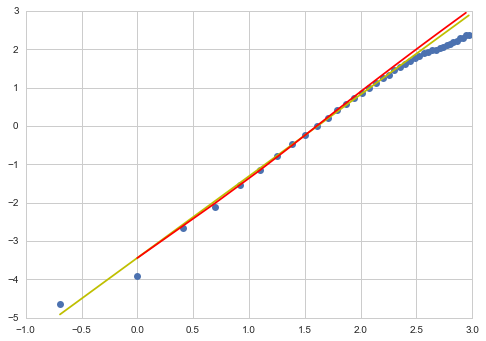

In [50]:
x = arange(0, max_speed, 0.5)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plt.plot(log(x), log(-log(1-y)),'o')

# 2. Weibull distribution
w_scale, c_shape = weibull_params[1], weibull_params[3]
qz=exp(-(x/c_shape)**w_scale)
plt.plot(log(x), log(-log(qz)),'-', color = 'y')

# 3. OEN3 distribution
x, y_ = x_vals_OEN3_LMSE, y_vals_OEN3_LMSE
y = array(zip(*y_)[0])
plt.plot(log(x), log(-log(1-y)),'-', color = 'r')

plt.show()

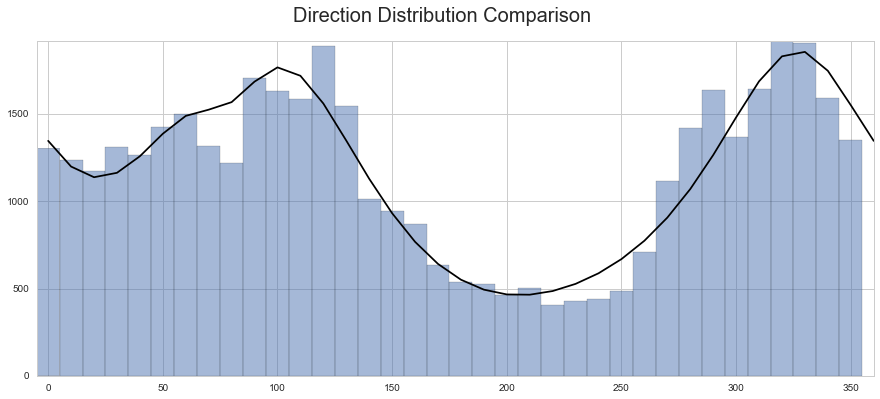

In [51]:
# Calculate Angle Distribution
x_vals = linspace(0,2*pi, num=36+1)
y_vals_ =[integrate.nquad(f, [[0, inf],[x_val-pi/36, x_val+pi/36]]) for x_val in x_vals]

# 1. integrate.nquad returns 2 vaule, result, abserr. Need to abstract the first to plot
# 2. * length of data size, to adjust the plot space
y_vals = array(zip(*y_vals_)[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5,figsize=(15, 6))

plt.plot(x_vals/pi*180, y_vals,'-', color='black')
plt.suptitle('Direction Distribution Comparison', fontsize = 20)
plt.axis('tight')
plt.show()

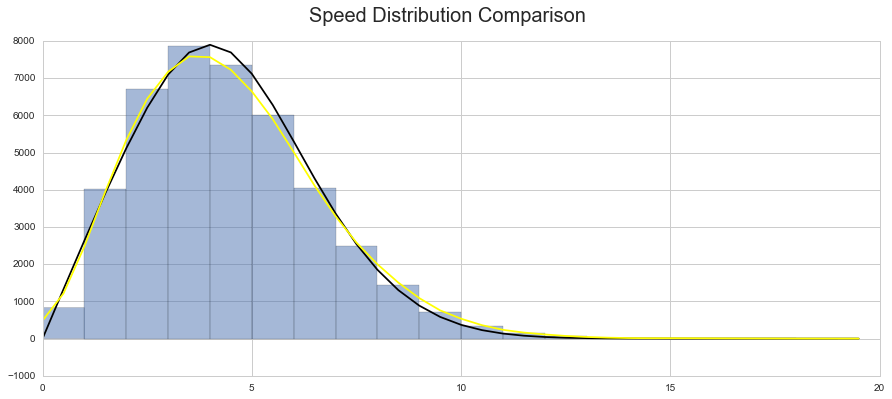

In [52]:
# Calculate Speed Distribution
# 1. GMM Model
x_vals = arange(0, max_speed, 0.5)
y_vals_ =[integrate.nquad(f, [[x_val-0.1, x_val+0.1],[0, 2*pi]]) for x_val in x_vals]
y_vals = array(zip(*y_vals_)[0])*len(df.speed)/0.2
plt.plot(x_vals, y_vals,'-', color='black')

# 2. Observation
df['speed'].hist(bins=arange(0, max_speed), alpha=0.5,figsize=(15, 6))

# 3. 1d KDE
sample = array(df.speed).reshape(-1, 1)
kde_temp = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(kde_temp.score_samples(x_val))*len(sample) for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow')

plt.suptitle('Speed Distribution Comparison', fontsize = 20)
plt.show()

## 5.3 Angle-wise Comaprison

In [53]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    hist_y_axis = [0, max_speed, 0, max_count]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        direction_prob = integrate.nquad(f, 
                                         [[0, inf],
                                          [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        
        # 1. Count Comparison
        # 1.1. Data Histogram
        fig = plt.figure(figsize=(22,4))
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5)
        plt.axis(hist_y_axis)
        
        # 1.2. Model Distribution
        x_vals = arange(0, sub_max_speed, 0.2)
        y_vals_ =[integrate.nquad(f, 
                  [[x_val-0.1, x_val+0.1],
                   [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                  for x_val in x_vals]
        y_vals = array(zip(*y_vals_)[0])/direction_prob[0] * len(sub_df.speed)/0.2
        plt.plot(x_vals, y_vals,'-', color='black')
        
        # 2. CDF Comaprison
        x =arange(0, sub_max_speed, 0.5)
        # 2.1. Data's empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_cdf = ecdf(x)
        
        # 2.2. Model
        y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_gmm = array(zip(*y_)[0])/direction_prob[0]
                
        # 2.3.1. Plot in ordinary axis
        ax3 = fig.add_subplot(1,3,2)
        plt.plot(x, y_cdf,'o')
        plt.plot(x, y_gmm,'-', color = 'r')
        
        # 2.3.2. Weibull plot
        ax4 = fig.add_subplot(1,3,3)
        plt.plot(log(x), log(-log(1-y_cdf)),'o')
        plt.plot(log(x), log(-log(1-y_gmm)),'-', color = 'r')
        
        plt.suptitle('%s (%s - %s) Degree Speed Distribution Comparison' % (angle, start_angle, end_angle), 
                     fontsize = 15)
        plt.show()
        
        diff = abs(y_cdf - y_gmm)
        max_diff_array.append([angle, diff.max(), x[diff.argmax()]])
        print 'data size:', len(sub_df)
        print 'max diff:', diff.max(), ', speed value:', x[diff.argmax()], 'y gmm', y_gmm[diff.argmax()],
    return max_diff_array

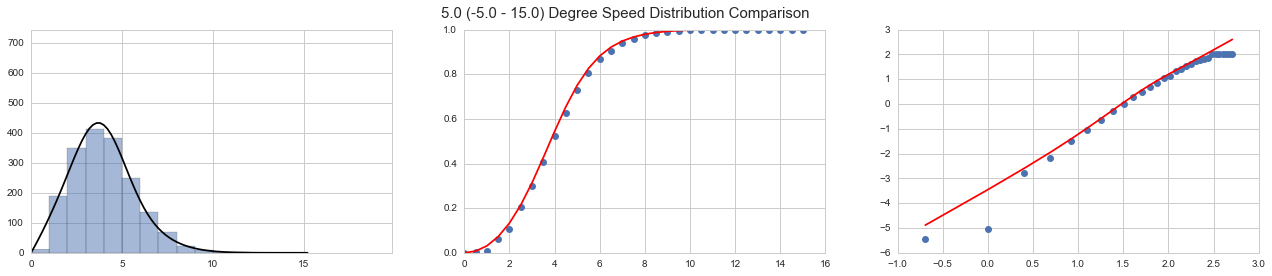

data size: 1841
max diff: 0.0286172877362 , speed value: 4.5 y gmm 0.654907347486

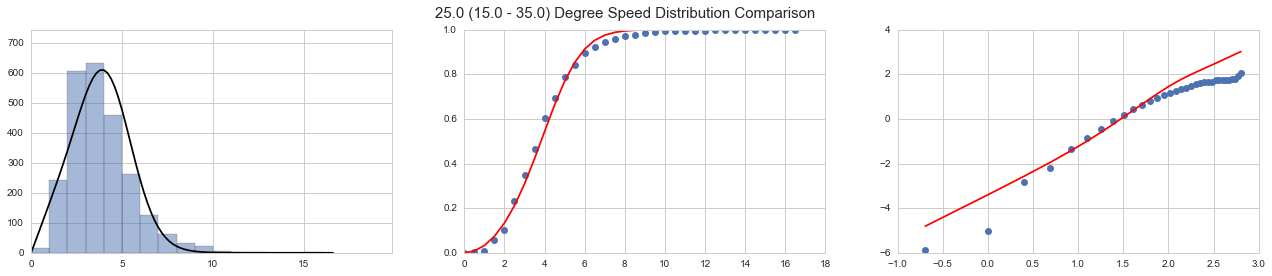

 data size: 2486
max diff: 0.0598697578138 , speed value: 4.0 y gmm 0.543509164149

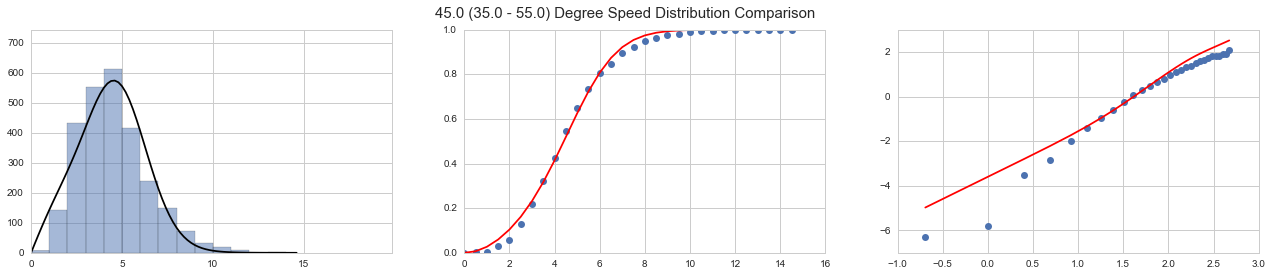

 data size: 2692
max diff: 0.047831956898 , speed value: 2.0 y gmm 0.104295552737

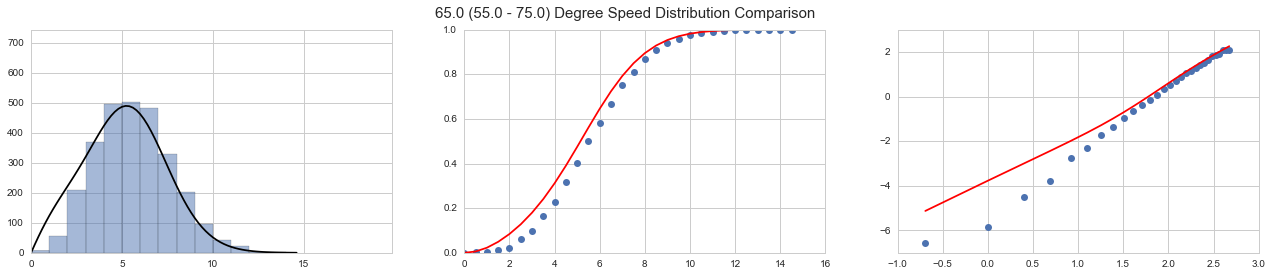

 data size: 2824
max diff: 0.0842374958318 , speed value: 4.0 y gmm 0.311574606313

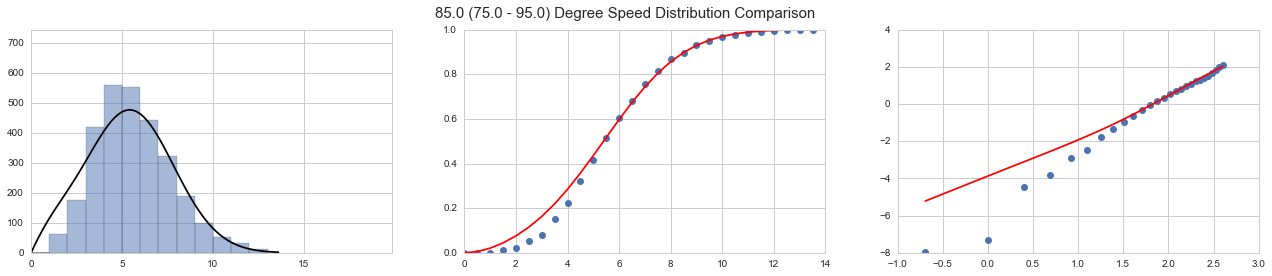

 data size: 2929
max diff: 0.0807738147534 , speed value: 3.0 y gmm 0.162713043159

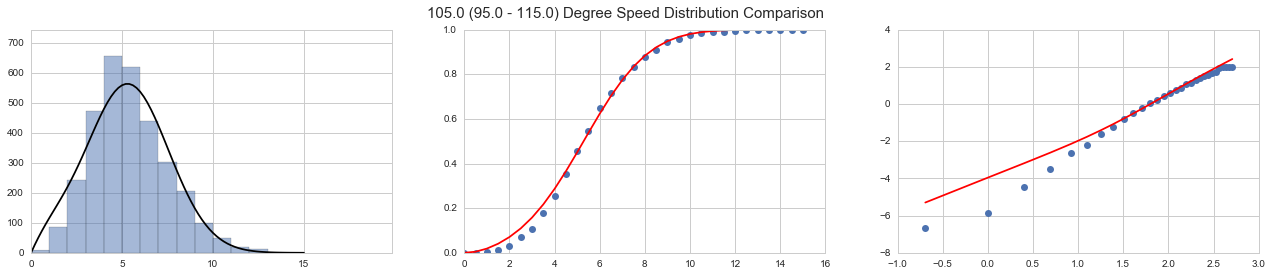

 data size: 3217
max diff: 0.0528364256939 , speed value: 3.0 y gmm 0.157903258147

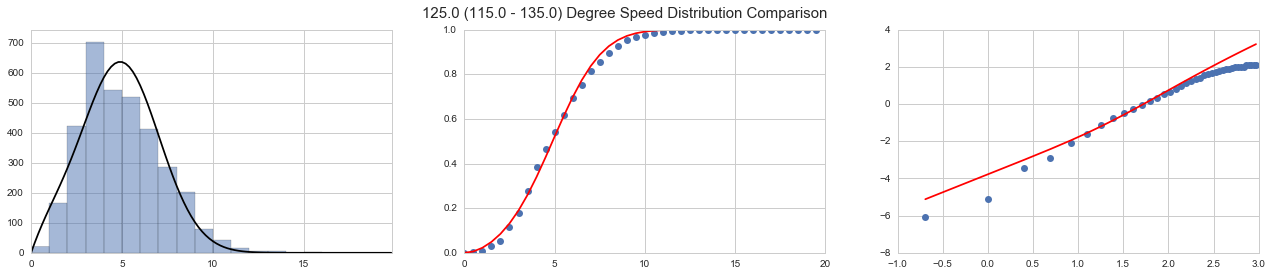

 data size: 3437
max diff: 0.0424147247012 , speed value: 4.0 y gmm 0.339895429503

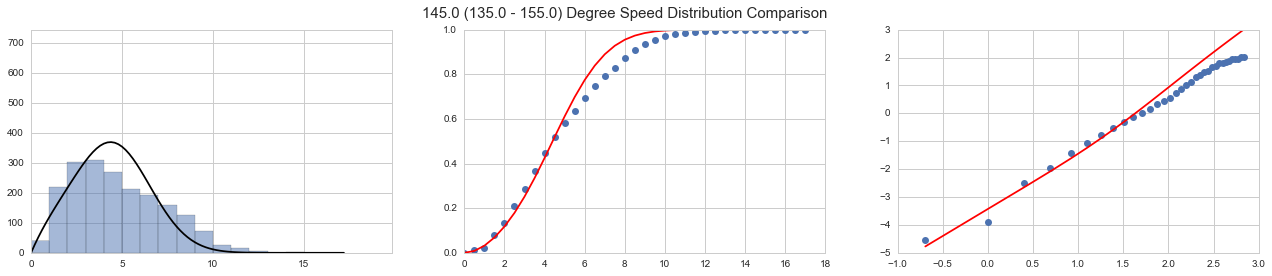

 data size: 1961
max diff: 0.0995470288208 , speed value: 7.0 y gmm 0.889450139479

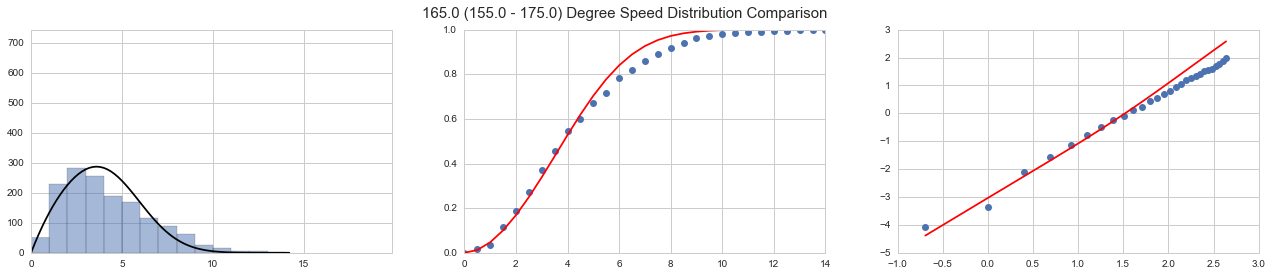

 data size: 1506
max diff: 0.0715210032064 , speed value: 6.5 y gmm 0.88891808156

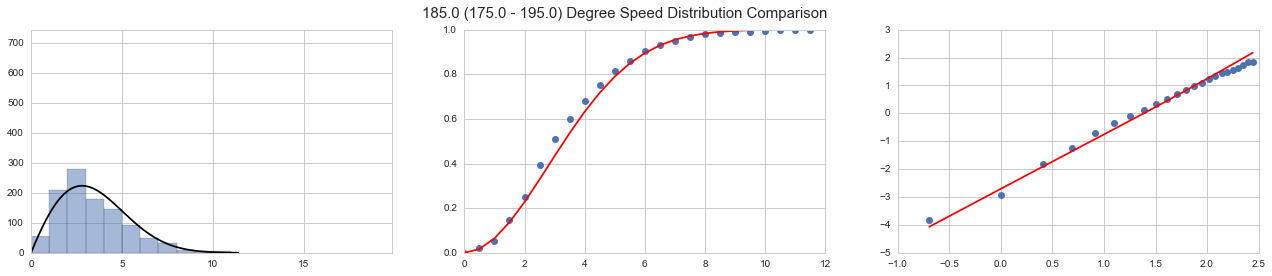

 data size: 1061
max diff: 0.0782136682975 , speed value: 3.0 y gmm 0.433567670063

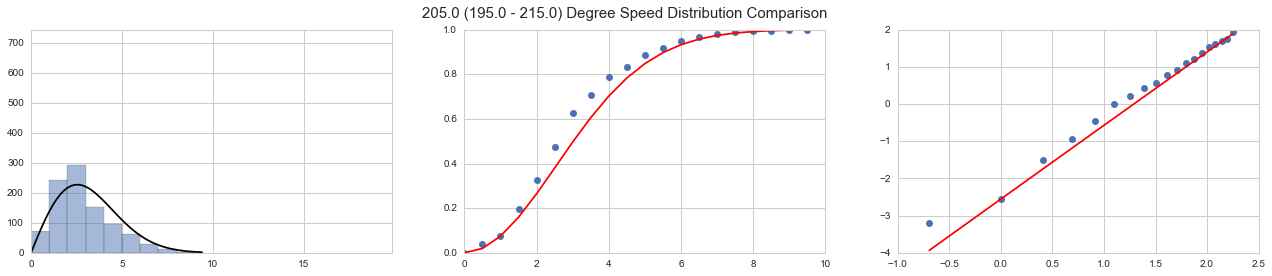

 data size: 968
max diff: 0.132048083395 , speed value: 3.0 y gmm 0.496051090159

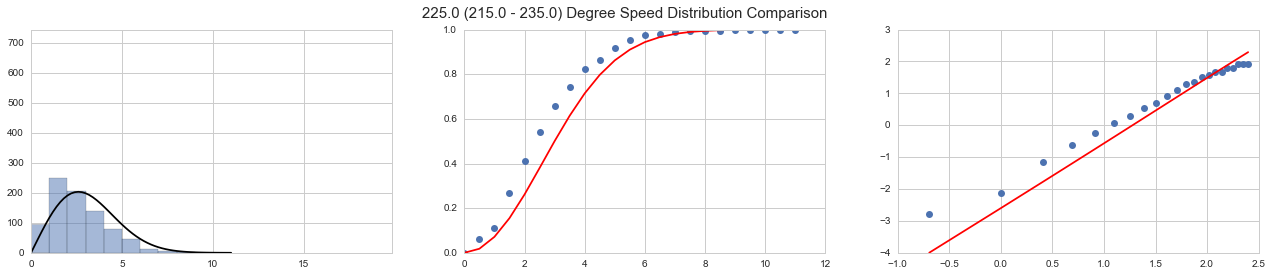

 data size: 838
max diff: 0.160795890389 , speed value: 2.5 y gmm 0.379776901974

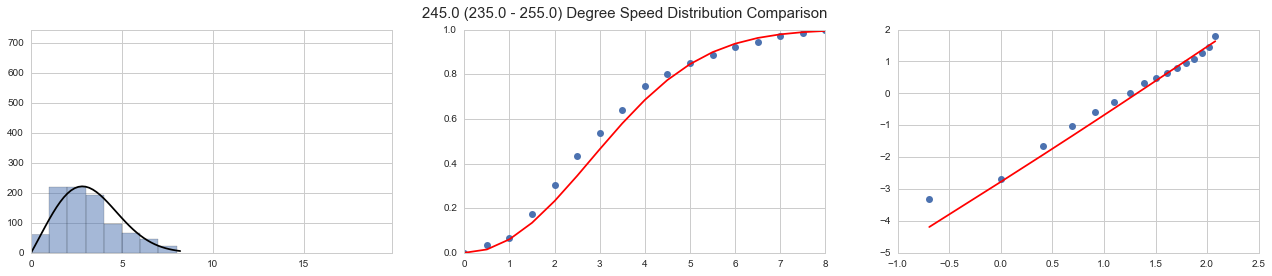

 data size: 927
max diff: 0.0865381316816 , speed value: 2.5 y gmm 0.344961328944

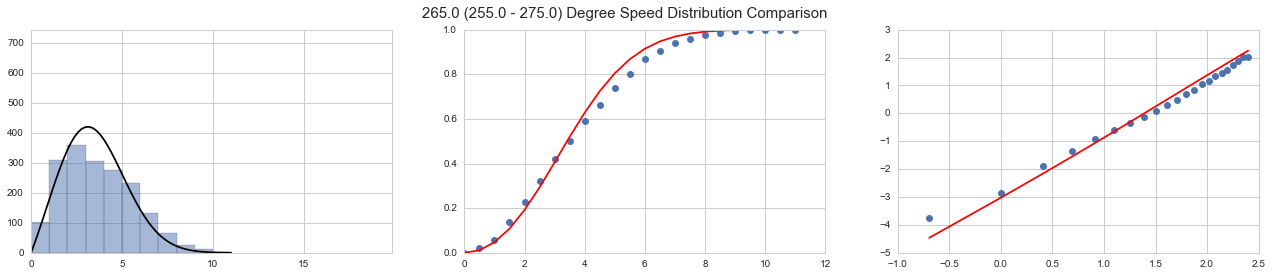

 data size: 1832
max diff: 0.0646175099038 , speed value: 5.5 y gmm 0.867565108157

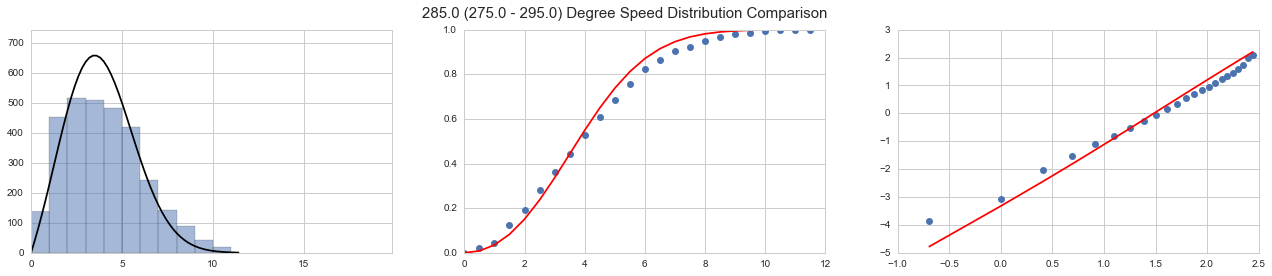

 data size: 3059
max diff: 0.0564559541945 , speed value: 5.5 y gmm 0.811604695613

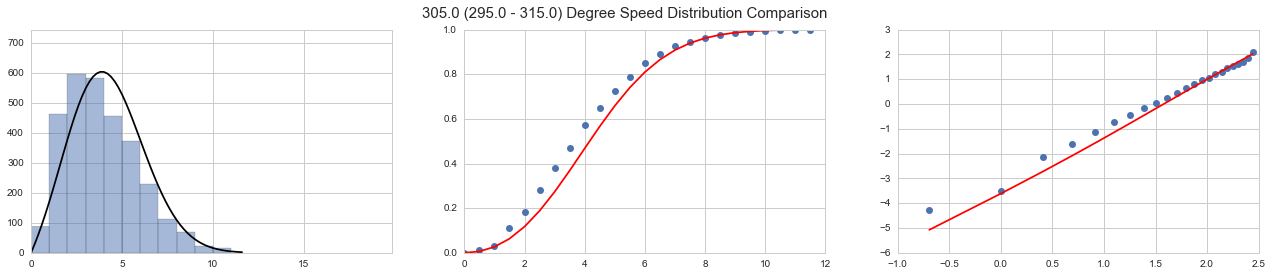

 data size: 3015
max diff: 0.107372119783 , speed value: 3.0 y gmm 0.273059057664

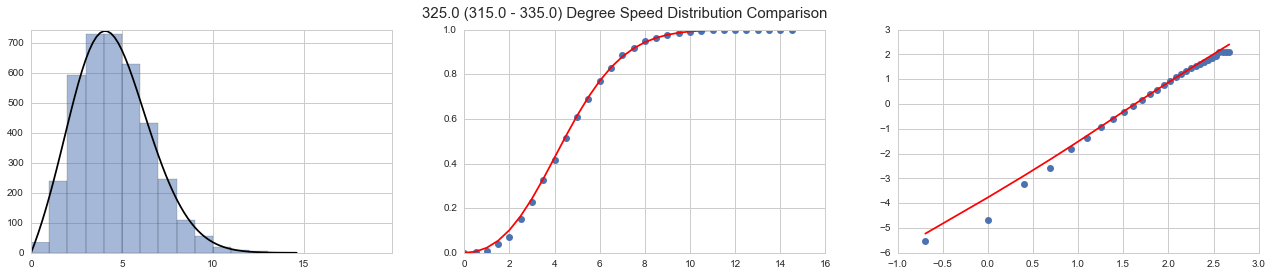

 data size: 3830
max diff: 0.0304423442864 , speed value: 2.0 y gmm 0.10198281426

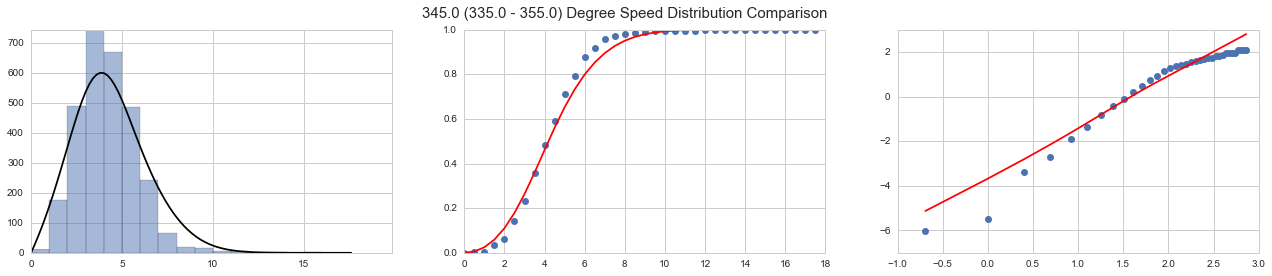

 data size: 2945
max diff: 0.0764206003181 , speed value: 6.0 y gmm 0.798961403077


In [54]:
if len(effective_coloumn) == 16:
    max_diff_array = model_data_comparison(df, SECTOR_LENGTH, 22.5)
else: 
    max_diff_array = model_data_comparison(df, SECTOR_LENGTH, 20)

### 5.3.1 Variance over the years

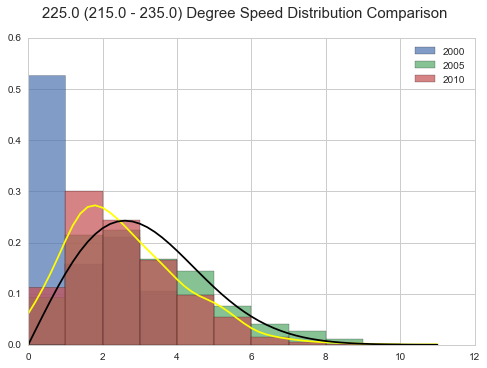

In [55]:
max_diff_element = max(max_diff_array, key=lambda x: x[1])
angle =  max_diff_angle = max_diff_element[0]
incre = 20

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, max_speed = select_df_by_angle(df, start_angle, end_angle)

x_vals = arange(0, max_speed, 0.2)

# 1. 1d KDE 
sample = array(sub_df.speed).reshape(-1, 1)
sub_kde = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(sub_kde.score_samples(x_val))
          for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow')

# 2. GMM
y_vals_ =[integrate.nquad(f, [[x_val-0.1, x_val+0.1],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_val in x_vals]
direction_prob = integrate.nquad(f, [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_vals = array(zip(*y_vals_)[0])/direction_prob[0] /0.2
plt.plot(x_vals, y_vals,'-', color='black')

for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years) > 0 :
        df_other_years_at_angle['speed'].hist(bins=arange(0, max_speed), 
                                              normed=True,alpha=0.7,
                                              label = str(int(start_time/10000)))

plt.suptitle('%s (%s - %s) Degree Speed Distribution Comparison' % (angle, start_angle, end_angle), 
             fontsize = 15)
plt.legend()
plt.show()

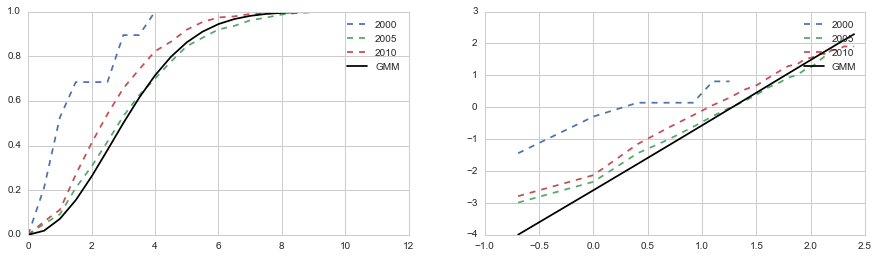

In [56]:
fig = plt.figure(figsize=(15,4))

x = arange(0, max_speed, 0.5)
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, _ = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        sample = df_other_years_at_angle.speed
        ecdf = sm.distributions.ECDF(sample)
        y_cdf = ecdf(x)

        ax1 = fig.add_subplot(1,2,1) 
        plt.plot(x, y_cdf,'--', label = str(int(start_time/10000)))

        ax3 = fig.add_subplot(1,2,2) 
        plt.plot(log(x), log(-log(1-y_cdf)),'--', label = str(int(start_time/10000)))
       
y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, [[0, inf],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_)[0])/direction_prob[0]

ax1 = fig.add_subplot(1,2,1) 
plt.plot(x, y_gmm,'-', color = 'black', label = 'GMM')
plt.legend()

ax3 = fig.add_subplot(1,2,2) 
plt.plot(log(x), log(-log(1-y_gmm)),'-', color = 'black',label = 'GMM')
plt.legend()

### 5.3.2 Bootstrap, to see the variance of each sector

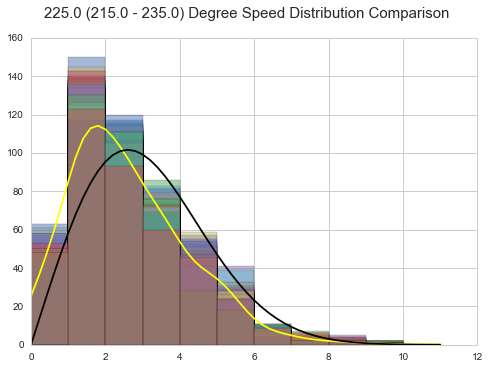

In [57]:
FRACTION = 0.5 

x_vals = arange(0, max_speed, 0.2)

# 1. 1d KDE 
sample = array(sub_df.speed).reshape(-1, 1)
sub_kde = neighbors.KernelDensity(bandwidth=0.5).fit(sample) 
y_vals = [exp(sub_kde.score_samples(x_val))*len(sub_df.speed)*FRACTION
          for x_val in x_vals]
plt.plot(x_vals, y_vals,'-', color='yellow')

#2. GMM
y_vals_ =[integrate.nquad(f, [[x_val-0.1, x_val+0.1],
                              [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_val in x_vals]
direction_prob = integrate.nquad(f, [[0, inf],
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_vals = array(zip(*y_vals_)[0])/direction_prob[0]/0.2 *len(sub_df.speed)*FRACTION
plt.plot(x_vals, y_vals,'-', color='black')

bins = arange(0, max_speed, 1)
for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    sub_df_resampled['speed'].hist(bins=bins, alpha=0.5)

plt.suptitle('%s (%s - %s) Degree Speed Distribution Comparison' % (angle, start_angle, end_angle), 
             fontsize = 15)

0.171535747191 2.5 0.379776901974


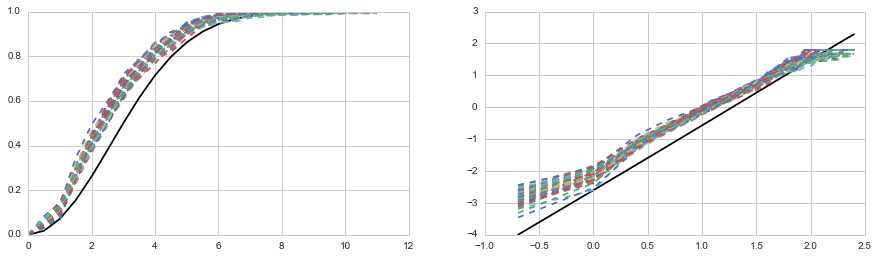

In [58]:
fig = plt.figure(figsize=(15,4))

x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
direction_prob = integrate.nquad(f, [[0, inf],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(zip(*y_)[0])/direction_prob[0]

ax1 = fig.add_subplot(1,2,1) 
plt.plot(x, y_gmm,'-', color = 'black')

ax3 = fig.add_subplot(1,2,2) 
plt.plot(log(x), log(-log(1-y_gmm)),'-', color = 'black')

for i in xrange(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)
    
    sample = sub_df_resampled.speed
    ecdf = sm.distributions.ECDF(sample)
    y_cdf = ecdf(x)

    ax1 = fig.add_subplot(1,2,1) 
    plt.plot(x, y_cdf,'--')

    ax3 = fig.add_subplot(1,2,2) 
    plt.plot(log(x), log(-log(1-y_cdf)),'--')
    
diff = abs(y_cdf - y_gmm)
print diff.max(), x[diff.argmax()], y_gmm[diff.argmax()]

# 6. Variance of results & Cross Validation

In [59]:
from sklearn.cross_validation import train_test_split, KFold

if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
    
points = FITTING_RANGE
    
def fit_gmm(df, number_of_gaussian = 3, fit_method = 'square_error'):
    # 1. Create Input, speed_set
    sample = sub_speed_set = array(zip(df.x, df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
    kde_result = exp(kde.score_samples(points))
    
    clf = mixture.GMM(n_components=number_of_gaussian, covariance_type='full')
    clf.fit(sample)
    gmm_em_result = read_gmm_em_result(clf)
        
    # 3. GMM fitting
    x0 = gmm_em_result
    bonds = [(0., 0.99),(-fit_limit, fit_limit),
             (-fit_limit, fit_limit),(0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*int(len(x0)/6)
    cons = [{'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
#             {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#             {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
           ]
 
    result = sp.optimize.minimize(
        lambda x0: GMM_fit_score(x0, kde_result, points, method=fit_method),
        x0,
        bounds = bonds,
        constraints = cons,
        tol = 0.000000000001,
        options = {"maxiter": 500})  
    
    # 4. Returns
    gmm = group_gmm_param_from_gmm_param_array(result.x)  
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    gmm_pdf_result = mixed_model_pdf(points)
    
    return {
        'gmm' : gmm,
        'kde_clf': kde,
        'kde_result': kde_result,
        'gmm_pdf_result': gmm_pdf_result,
        'number_of_iteration': result.nit,
    }

## 6.1 Variance of the Result

,weight,mean_x,mean_y,sig_x,sig_y,corr
0,0.507775,1.679175,-1.763606,2.777933,2.274765,-0.106947
1,0.334477,-1.420489,3.982852,2.418725,2.594319,0.278506
2,0.157748,3.216072,2.372748,1.320189,2.736312,-0.037513


GMM Plot Result
0.507775245829 [[ 1.67917465 -1.76360604]] [ 2.23742597  2.80809373] -103.998526406
0.334476977768 [[-1.42048942  3.9828515 ]] [ 2.1185331  2.8447389] 142.067905924
0.157747776402 [[ 3.21607218  2.37274784]] [ 1.31897844  2.73689543] -178.649387078


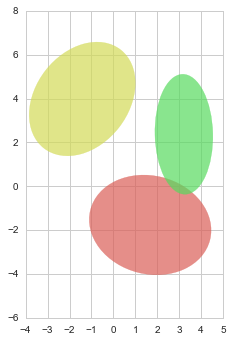

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.099744,0.012166,2.740876e-07,0.036228,0.191636,0.977377


,weight,mean_x,mean_y,sig_x,sig_y,corr
0,0.506890,1.653322,-1.797813,2.742170,2.260554,-0.090263
1,0.339234,-1.455213,4.037732,2.465102,2.587888,0.257770
2,0.153876,3.170261,2.413922,1.337322,2.534274,-0.067983


GMM Plot Result
0.506889586118 [[ 1.65332172 -1.79781312]] [ 2.23304886  2.76461405] -102.456306248
0.339234396195 [[-1.45521285  4.03773191]] [ 2.1710653   2.83907928] 140.341614924
0.153876017687 [[ 3.17026066  2.41392202]] [ 1.33304248  2.53652717] -177.160656509


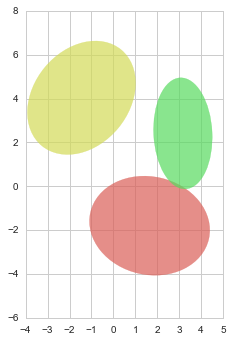

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.099421,0.01243,2.876025e-07,0.036313,0.196231,0.976226


,weight,mean_x,mean_y,sig_x,sig_y,corr
0,0.503732,1.707142,-1.807365,2.766809,2.244503,-0.080284
1,0.338897,-1.480025,4.027237,2.417053,2.557697,0.243144
2,0.157371,3.180797,2.377133,1.337589,2.564825,-0.052827


GMM Plot Result
0.503731784242 [[ 1.70714217 -1.80736483]] [ 2.2239701   2.78334064] -100.427450615
0.338897439449 [[-1.48002501  4.02723689]] [ 2.15607709  2.78123904] 141.550789343
0.15737077631 [[ 3.18079731  2.37713294]] [ 1.33502635  2.56615978] -177.83592609


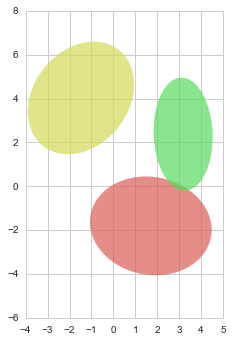

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.094548,0.011888,2.701156e-07,0.035329,0.190112,0.977711


,weight,mean_x,mean_y,sig_x,sig_y,corr
0,0.492729,1.708304,-1.848059,2.686290,2.253974,-0.070386
1,0.344221,-1.535885,3.868164,2.387826,2.671060,0.214443
2,0.163051,3.246381,2.603479,1.384128,2.799236,-0.158750


GMM Plot Result
0.492728568881 [[ 1.70830367 -1.84805881]] [ 2.23573196  2.70149127] -100.878114308
0.344220698249 [[-1.53588472  3.86816407]] [ 2.20774569  2.82172571] 148.822974837
0.16305073287 [[ 3.24638087  2.60347937]] [ 1.36109523  2.81050773] -174.130507807


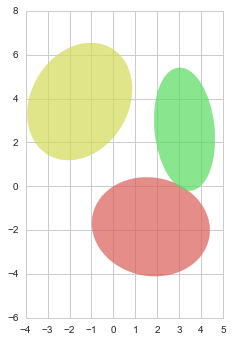

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.095645,0.013146,2.763595e-07,0.035614,0.192272,0.976713


,weight,mean_x,mean_y,sig_x,sig_y,corr
0,0.500444,1.701027,-1.859479,2.712455,2.249422,-0.079729
1,0.360553,-1.369604,3.996991,2.609519,2.668026,0.253785
2,0.139003,3.194087,2.258627,1.317807,2.404286,-0.117142


GMM Plot Result
0.500444341245 [[ 1.70102698 -1.85947892]] [ 2.22736277  2.73059789] -101.475543257
0.360552911684 [[-1.369604   3.9969915]] [ 2.27822924  2.95594748] 137.496780143
0.139002747071 [[ 3.19408686  2.25862721]] [ 1.30492712  2.41130073] -174.79936828


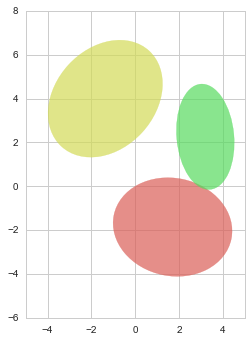

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.068165,0.013142,2.628403e-07,0.034755,0.18753,0.978065


,weight,mean_x,mean_y,sig_x,sig_y,corr
0,0.509954,1.666796,-1.804904,2.725566,2.278366,-0.081875
1,0.337775,-1.438450,3.981658,2.439272,2.640420,0.276827
2,0.152271,3.189392,2.303898,1.312237,2.587747,-0.119314


GMM Plot Result
0.509953968853 [[ 1.66679633 -1.8049042 ]] [ 2.254074   2.7456897] -102.218753292
0.337774873912 [[-1.43844952  3.98165823]] [ 2.14621146  2.88368499] 142.994506399
0.152271157235 [[ 3.18939211  2.30389764]] [ 1.29968531  2.59407408] -175.37402024


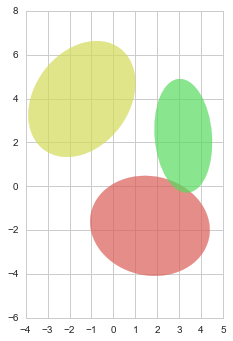

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.11416,0.014068,2.752550e-07,0.035777,0.191912,0.977437


,weight,mean_x,mean_y,sig_x,sig_y,corr
0,0.497065,1.686777,-1.848381,2.737160,2.190752,-0.085226
1,0.339281,-1.544459,3.938403,2.391311,2.618990,0.219875
2,0.163654,3.203208,2.519367,1.361162,2.604529,-0.107396


GMM Plot Result
0.497064600879 [[ 1.68677725 -1.84838061]] [ 2.1692535   2.75422852] -100.393110443
0.339281391104 [[-1.54445921  3.93840338]] [ 2.19049095  2.78912673] 146.249703434
0.163654008017 [[ 3.20320784  2.51936712]] [ 1.3503837   2.61013366] -175.610512069


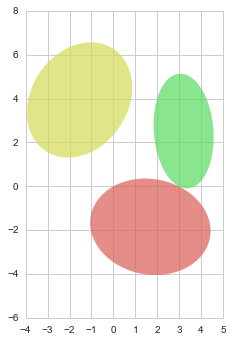

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.0962,0.011409,2.585740e-07,0.034274,0.185814,0.978653


,weight,mean_x,mean_y,sig_x,sig_y,corr
0,0.501007,1.703925,-1.860920,2.732233,2.225564,-0.072063
1,0.330864,-1.503026,3.906709,2.349044,2.621879,0.231280
2,0.168129,3.161803,2.519572,1.401504,2.612237,-0.135814


GMM Plot Result
0.501006842657 [[ 1.70392526 -1.8609197 ]] [ 2.2088209   2.74578698] -99.6166861499
0.330864400857 [[-1.50302597  3.90670856]] [ 2.14907372  2.78814289] 147.728729727
0.168128756486 [[ 3.16180269  2.51957222]] [ 1.38342306  2.62185735] -174.217413364


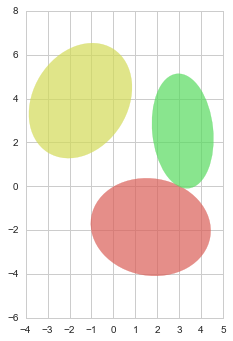

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.113952,0.012673,2.743050e-07,0.03619,0.191501,0.977479


,weight,mean_x,mean_y,sig_x,sig_y,corr
0,0.504390,1.646536,-1.777118,2.743166,2.241472,-0.089392
1,0.337328,-1.461680,3.989210,2.454643,2.652351,0.279706
2,0.158282,3.220510,2.371057,1.339303,2.598661,-0.063098


GMM Plot Result
0.504389933585 [[ 1.64653596 -1.77711838]] [ 2.21556305  2.76413324] -101.864723591
0.337327839578 [[-1.4616802   3.98921035]] [ 2.15415534  2.90169817] 142.747472413
0.158282226837 [[ 3.22050961  2.37105711]] [ 1.33567429  2.60052776] -177.46946571


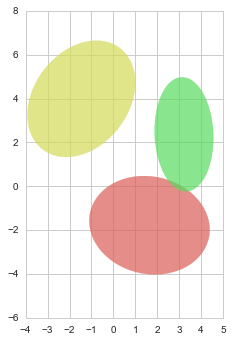

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.103364,0.013812,2.803675e-07,0.035584,0.193773,0.976843


,weight,mean_x,mean_y,sig_x,sig_y,corr
0,0.504517,1.627880,-1.796596,2.803282,2.269392,-0.129108
1,0.345166,-1.384615,4.115998,2.573354,2.580544,0.269915
2,0.150318,3.219845,2.111606,1.323080,2.509884,-0.036415


GMM Plot Result
0.50451664787 [[ 1.62787996 -1.79659647]] [ 2.2182226  2.8439436] -105.61953438
0.345165588769 [[-1.38461516  4.11599841]] [ 2.20185712  2.90399448] 135.296100122
0.150317763361 [[ 3.21984542  2.11160635]] [ 1.32186571  2.51052356] -178.478331843


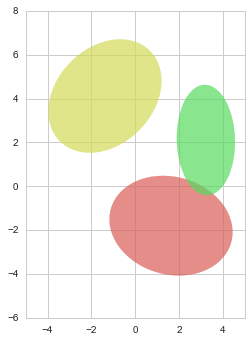

,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.069326,0.010584,2.521502e-07,0.035677,0.183663,0.978896


In [60]:
for i in range(10):
    df_resampled = df.sample(frac=1, replace=True)
    result = fit_gmm(df_resampled, NUMBER_OF_GAUSSIAN, fit_method = FIT_METHOD)
    display(pretty_print_gmm(result['gmm']))
    plot_gmm_ellipses(result['gmm'])
    pretty_pd_display([goodness_of_fit_summary(result['gmm_pdf_result'], result['kde_result'])])

## 6.2 Cross validation, to select the number of Gaussian

In [62]:
## 5-fold cross validation
gaussian_number_range = arange(1,7)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, number_of_gaussian, fit_method = FIT_METHOD)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        CV_result_train.append(gof_train)
        CV_result_test.append(gof_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print 'Train'
    pretty_pd_display(CV_result_train)
    print 'Test'
    pretty_pd_display(CV_result_test)

Number of train/test dataset 31552.5 10517.5
  
Number of gaussian 1
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.076263,0.046381,0.000002,0.083643,0.450664,0.873586
1,0.074697,0.046358,0.000002,0.083943,0.448461,0.875574
2,0.075345,0.046772,0.000002,0.082032,0.449173,0.875653
3,0.075287,0.046373,0.000002,0.084423,0.452992,0.872467


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.076028,0.047776,0.000001,0.081201,0.440029,0.881817
1,0.082961,0.052424,0.000002,0.085008,0.471345,0.861866
2,0.080718,0.051528,0.000002,0.089783,0.461951,0.865886
3,0.078696,0.046108,0.000001,0.081217,0.444603,0.878827


  
Number of gaussian 2
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.045966,0.013037,5.120643e-07,0.048152,0.261796,0.957457
1,0.047490,0.013065,4.871966e-07,0.047104,0.255333,0.959908
2,0.044595,0.012415,4.988631e-07,0.048485,0.258445,0.958464
3,0.043860,0.012696,5.001003e-07,0.048040,0.258636,0.958425


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.047132,0.013588,4.881856e-07,0.048576,0.255554,0.959786
1,0.055490,0.013360,5.714230e-07,0.052086,0.276572,0.951567
2,0.042218,0.014675,5.271429e-07,0.047564,0.265416,0.956846
3,0.057555,0.021670,5.321637e-07,0.049271,0.267076,0.956265


  
Number of gaussian 3
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.082844,0.011750,2.726916e-07,0.035311,0.191038,0.977587
1,0.085507,0.012933,2.741195e-07,0.035135,0.191578,0.977273
2,0.095286,0.012323,2.737476e-07,0.036017,0.191317,0.977202
3,0.098411,0.013621,2.595289e-07,0.034537,0.186401,0.978362


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.108450,0.018010,2.986090e-07,0.037425,0.199890,0.974600
1,0.078573,0.014819,2.916287e-07,0.036978,0.197416,0.975834
2,0.101380,0.011609,3.034865e-07,0.035802,0.201802,0.975203
3,0.114479,0.013099,3.385447e-07,0.039540,0.212735,0.972415


  
Number of gaussian 4
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.171247,0.009736,1.454096e-07,0.025920,0.139543,0.987959
1,0.124856,0.009206,1.513041e-07,0.026214,0.142330,0.987430
2,0.160508,0.009478,1.523310e-07,0.026521,0.142737,0.987369
3,0.088669,0.010016,1.567334e-07,0.026931,0.144794,0.986997


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.152755,0.010825,2.047679e-07,0.030508,0.165384,0.982968
1,0.108921,0.013593,1.882671e-07,0.029673,0.158624,0.984496
2,0.086480,0.010660,1.765880e-07,0.028361,0.153868,0.985362
3,0.389293,0.010545,1.605331e-07,0.026953,0.146678,0.986712


  
Number of gaussian 5
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.022574,0.005811,7.094583e-08,0.017837,0.097462,0.994157
1,0.019438,0.006091,7.254737e-08,0.018131,0.098555,0.993957
2,0.038399,0.007428,6.682359e-08,0.017708,0.094540,0.994436
3,0.035229,0.006366,6.481453e-08,0.017461,0.093118,0.994631


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.025149,0.015260,1.225259e-07,0.024698,0.127963,0.989650
1,0.056298,0.012695,1.135455e-07,0.022790,0.123190,0.990728
2,0.030547,0.021813,1.244672e-07,0.023252,0.129171,0.989822
3,0.032590,0.008285,1.062635e-07,0.021408,0.119313,0.991164


  
Number of gaussian 6
Train


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.166740,0.007377,4.186470e-08,0.013792,0.074859,0.996547
1,0.014980,0.004706,3.703495e-08,0.012992,0.070400,0.996932
2,0.014366,0.004871,4.008971e-08,0.013609,0.073246,0.996647
3,0.011766,0.004666,3.708888e-08,0.013184,0.070447,0.996928


Test


,Chi_square,K_S,MSE,RMSE / Max,RMSE / Mean,R_square
0,0.020826,0.006227,6.802597e-08,0.018034,0.095383,0.994273
1,0.035874,0.007376,6.735403e-08,0.017863,0.094945,0.994398
2,0.019481,0.007455,9.142266e-08,0.020389,0.110617,0.992618
3,0.016711,0.007477,7.234556e-08,0.017758,0.098419,0.993986


In [ ]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print 'Train gof mean, std'
display(train_scores_mean)
display(train_scores_std)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print 'Test gof mean, std'
display(test_scores_mean)
display(test_scores_std)

In [ ]:
prop_cycle=sns.color_palette()
for column in ['R_square','Chi_square', 'K_S']:
    fig, ax = plt.subplots()
    fig.set_size_inches(7, 3)
    plt.plot(gaussian_number_range, train_scores_mean[column],
             '-', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plt.plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.suptitle(column)
    plt.xticks(gaussian_number_range)
    plt.legend()
    plt.show()

## 6.3 Variance of KDE

In [ ]:
sss

In [ ]:
gmm1 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,
        0.372591,2.376362,-2.098443,1.621717,2.213625,-0.01429,
        0.055879,1.009152,-1.430799,2.10049,0.808011,0.08083,
        0.019425,-0.432981,2.574572,0.784784,0.796954,-0.020531]

gmm2 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,
        0.372591,2.376362,-2.098443,1.621717,2.213625,-0.01429,]

gmm3 = [0.552104,-0.055681,2.256591,2.757752,2.731348,0.034628,]

gmms = [gmm1,gmm2,gmm3]
pdfs =[]

for gmm in gmms:
    plot_gmm_ellipses(gmm)
    gmm = group_gmm_param_from_gmm_param_array(gmm) 
    mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
    X = Y = PLOT_AXIS_RANGE
    pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument
    pdfs.append(pdf_Z)
    plot_2d_prob_density(X,Y,pdf_Z)

In [ ]:
plot_2d_prob_density(X,Y,pdfs[0]-pdfs[1])

In [ ]:
for start_time in xrange(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    sub_df = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    sample = sub_speed_set = array(zip(sub_df.x, sub_df.y))
    points = FITTING_RANGE
    
    # 2. KDE + EM fitting
    kde = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
    
    X = Y = PLOT_AXIS_RANGE
    kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
    fig, ax = plt.subplots()
    fig.set_size_inches(14, 4)
    plot_2d_prob_density(X,Y,kde_Z,ax)
    plt.show()
#     plot_speed_and_angle_distribution(sub_df.speed, sub_df.dir)

In [ ]:
## 5-fold cross validation
gaussian_number_range = arange(3,5)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print 'Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold

for number_of_gaussian in gaussian_number_range:
    print '  '
    print 'Number of gaussian', number_of_gaussian
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result_train, CV_result_test = [],[]
    for train_index, test_index in kf:
        sub_df, sub_df_test = df.iloc[train_index], df.iloc[test_index]

        # 1. Train
        result = fit_gmm(sub_df, number_of_gaussian, fit_method = FIT_METHOD)
        gmm_pdf_result_train = result['gmm_pdf_result']
        kde_train = result['kde_clf']
        kde_result_train = result['kde_result']

        # 2. Validate
        # GMM from Train - KDE from Test
        sample = array(zip(sub_df_test.x, sub_df_test.y))
        kde_test = neighbors.KernelDensity(bandwidth=bandwidth).fit(sample) 
        kde_result_test = exp(kde_test.score_samples(points))

        gof_train = goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_train,)
        gof_test =  goodness_of_fit_summary(gmm_pdf_result_train, 
                                            kde_result_test,)
                
        # Plot jPDF
        X = Y = PLOT_AXIS_RANGE
        kde_train_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde_train.score_samples(coords)))
        fig = plt.figure(figsize=(22,6))
        ax1 = fig.add_subplot(1,3,1)
        plot_2d_prob_density(X,Y,kde_train_Z, ax1)
        
        ax2 = fig.add_subplot(1,3,2)
        kde_test_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde_test.score_samples(coords)))
        plot_2d_prob_density(X,Y,kde_test_Z, ax2)
            
        ax3 = fig.add_subplot(1,3,3)
        plot_2d_prob_density(X,Y,kde_train_Z-kde_test_Z,ax3)
        
        pretty_pd_display([gof_train, gof_test], index=["gof_train", "gof_test"]))
        